In [1]:
%matplotlib inline 
# Data analysis packages
import numpy as np
import pandas as pd
import sklearn

# Plotting Packages
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the data
loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# Show number of rows and columns 
print(loan.shape)

# get variable names
print(loan.columns) 

(5000, 14)
Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [3]:
# Show data head
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Show data tail
loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [30]:
loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
# Drop duplicate rows 
loan.drop_duplicates()

# Drop na rows
loan.dropna(axis = 'columns')
loan.shape, loan.columns

((5000, 14),
 Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
        'CD Account', 'Online', 'CreditCard'],
       dtype='object'))

In [7]:
# Define variables and target
var = ['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online']

loan_x = loan[var]
loan_y = loan['CreditCard']

(5000, 13)
(5000,)


<AxesSubplot:>

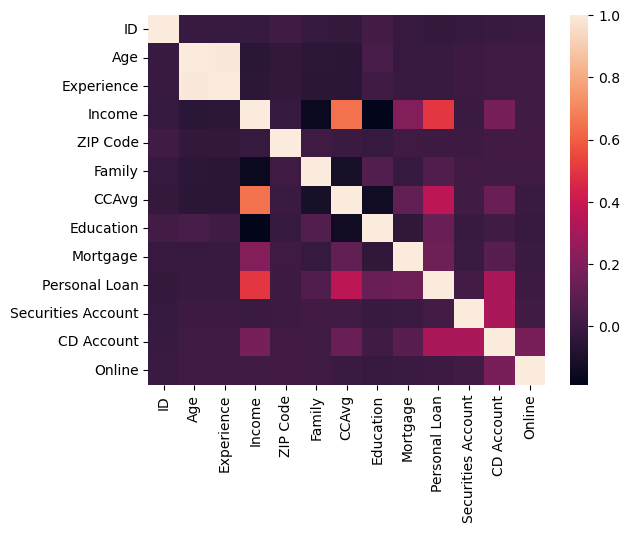

In [8]:
# Show dimensions
print(loan_x.shape)
print(loan_y.shape)

loan_x.corr()

sns.heatmap(loan_x.corr())

HISTOGRAM OF INCOME DISTRIBUTION

Text(0, 0.5, 'Frequency')

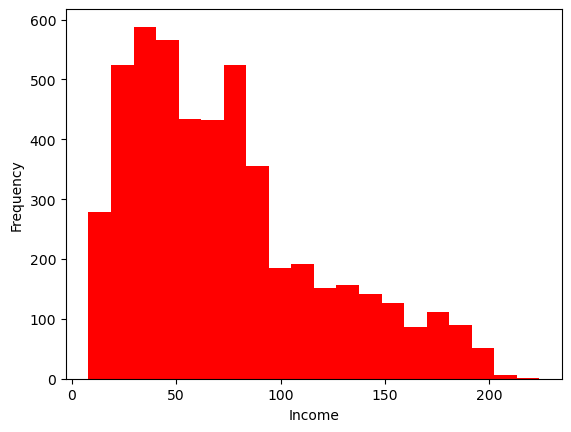

In [9]:
x = loan['Income']
plt.hist(x,bins = 20, color = 'r')
plt.xlabel('Income')
plt.ylabel('Frequency')

HISTOGRAM OF AGE DISTRIBUTION

Text(0, 0.5, 'Frequency')

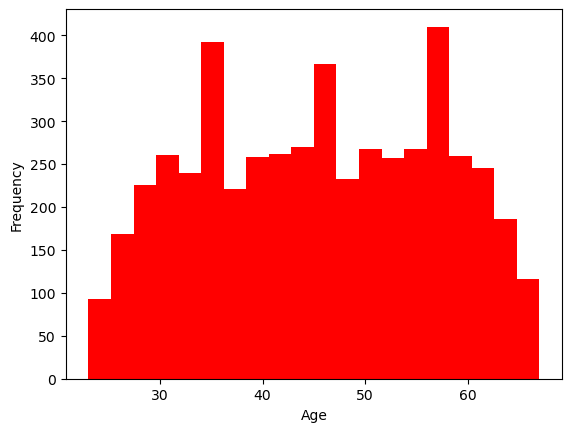

In [10]:
x = loan['Age']
plt.hist(x,bins = 20, color = 'r')
plt.xlabel('Age')
plt.ylabel('Frequency')


HISTOGRAM OF FAMILY SIZE DISTRIBUTION

Text(0, 0.5, 'Frequency')

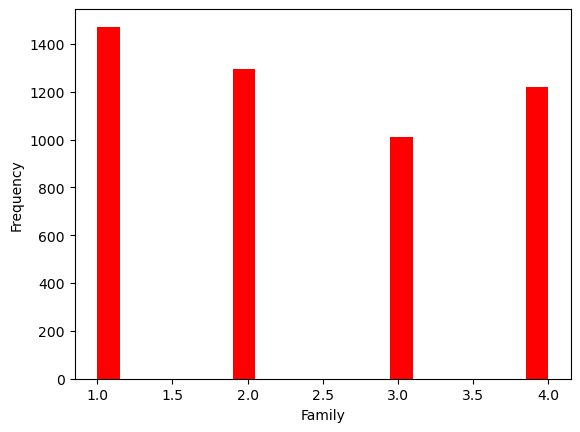

In [11]:
x = loan['Family']
plt.hist(x,bins = 20, color = 'r')
plt.xlabel('Family')
plt.ylabel('Frequency')

HISTOGRAM OF AVERAGE CREDIT CARD SPEND DISTRIBUTION

Text(0, 0.5, 'Frequency')

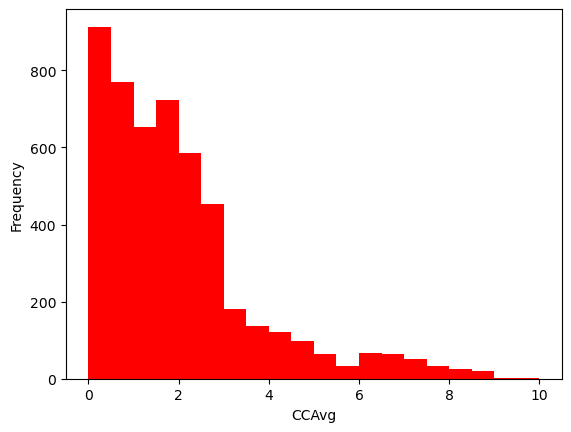

In [12]:
x = loan['CCAvg']
plt.hist(x,bins = 20, color = 'r')
plt.xlabel('CCAvg')
plt.ylabel('Frequency')

In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(loan_x, 
                                                    loan_y, 
                                                    random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, criterion='entropy')
dt.fit(X_train, y_train)
dt.score(X_test, y_test), dt.score(X_train, y_train)

(0.6352, 1.0)

In [32]:
# Feature Importance
dt.feature_importances_

array([0.21558034, 0.09780537, 0.07069826, 0.15210417, 0.15098817,
       0.03680094, 0.07382063, 0.02174433, 0.05138141, 0.01290365,
       0.01362672, 0.05529924, 0.04724677])

In [ ]:
# A Basic Tree
from sklearn.tree import DecisionTreeClassifier

dt_3 = DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')
dt_3.fit(X_train, y_train)
dt_3.score(X_test, y_test), dt_3.score(X_train, y_train)

In [34]:
# GridSearch with Cross-Validation

from sklearn.model_selection import GridSearchCV

optimal_tree = DecisionTreeClassifier(random_state = 0)

dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(optimal_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [35]:
# Report the best hyperparameters chosen

grid_tree.best_params_

{'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_split': 2}

In [37]:
grid_tree.best_score_

0.7421333333333333

In [39]:
from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_))

|--- feature_11 <= 0.50
|   |--- feature_10 <= 0.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 0
|   |--- feature_10 >  0.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  0.50
|   |   |   |--- class: 0
|--- feature_11 >  0.50
|   |--- feature_10 <= 0.50
|   |   |--- class: 1
|   |--- feature_10 >  0.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 0



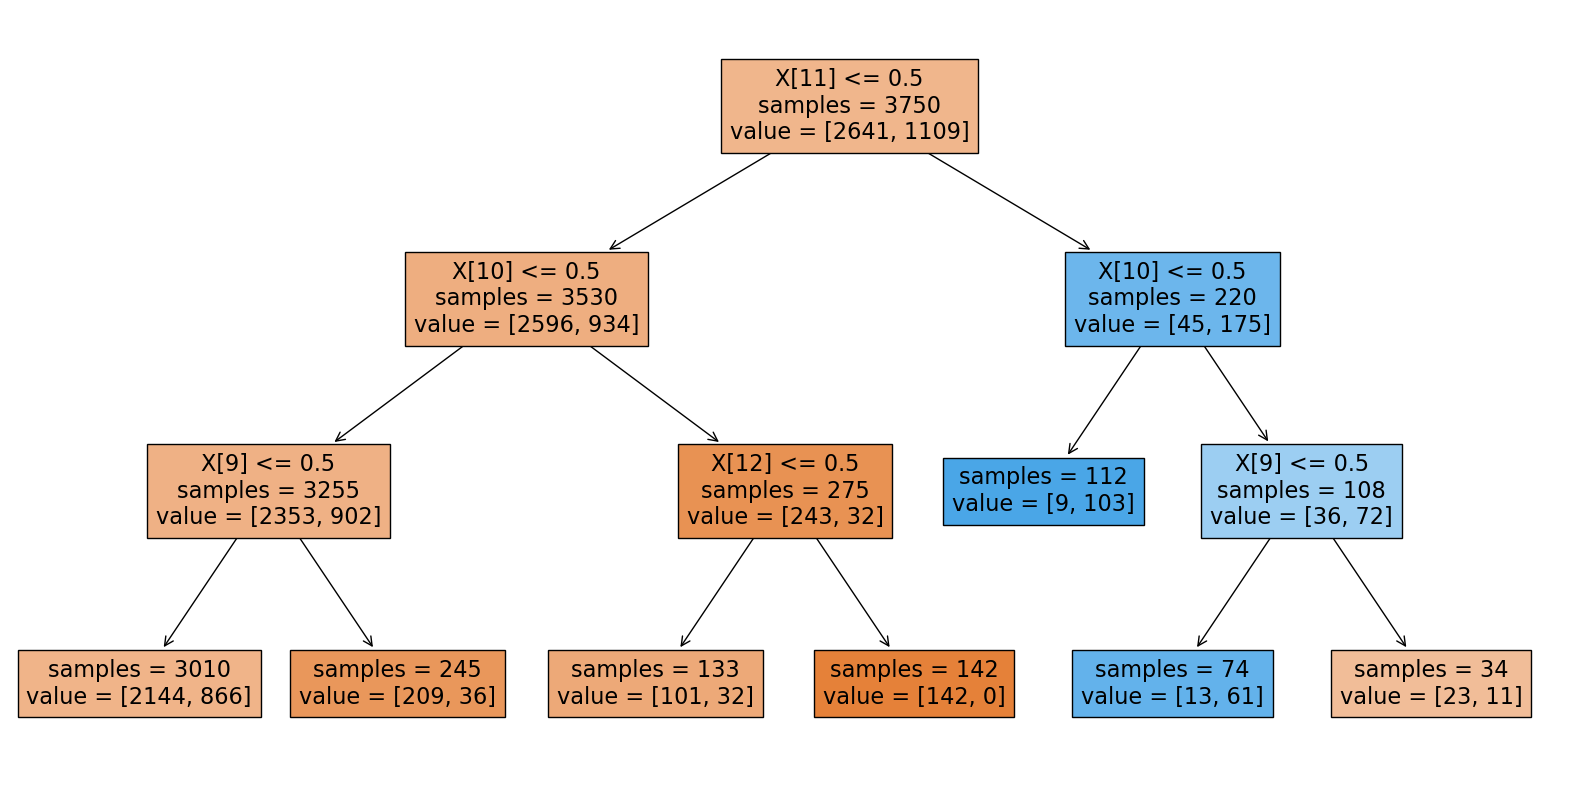

In [41]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) 

tree.plot_tree(grid_tree.best_estimator_, 
               
               filled = True, impurity = False) 
plt.show()
